<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/DDA/extract_5Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치 및 matplotlib 시각화

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### loading dataset file and check dataframe

In [3]:
import pandas as pd

In [9]:
df_SMDWD = pd.read_csv('ShoppingMallDeliveryWithDate.csv')
df_SMDWD[10:20]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
10,무통장입금,D-20181231-0000205-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,94710,1058.0,1,PC쇼핑몰,20181231
11,무통장입금,D-20181231-0000205-01,2019-01-03 오전 9:30,2019-01-07 오전 5:32,107910,1059.0,1,PC쇼핑몰,20181231
12,무통장입금,D-20181231-0000205-02,2019-01-03 오전 9:30,2019-01-07 오전 5:32,82170,1071.0,1,PC쇼핑몰,20181231
13,무통장입금,D-20181231-0000205-03,2019-01-03 오전 9:30,2019-01-07 오전 5:32,63470,1373.0,1,PC쇼핑몰,20181231
14,무통장입금,D-20181231-0000205-04,2019-01-03 오전 9:30,2019-01-07 오전 5:32,75240,1374.0,1,PC쇼핑몰,20181231
15,무통장입금,D-20181231-0000205-05,2019-01-03 오전 9:30,2019-01-07 오전 5:32,121110,1037.0,1,PC쇼핑몰,20181231
16,무통장입금,D-20181231-0000211-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,126940,1373.0,2,PC쇼핑몰,20181231
17,무통장입금,D-20181231-0000211-01,2019-01-03 오전 9:30,2019-01-07 오전 5:32,75240,1374.0,1,PC쇼핑몰,20181231
18,무통장입금,D-20181231-0000211-02,2019-01-03 오전 9:30,2019-01-07 오전 5:32,121110,1037.0,1,PC쇼핑몰,20181231
19,무통장입금,D-20181231-0000211-03,2019-01-03 오전 9:30,2019-01-07 오전 5:32,75240,1374.0,1,PC쇼핑몰,20181231


In [52]:
df_SMDWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [7]:
df_SMDWD.describe()   # 수치형 파악

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


In [11]:
df_SMDWD.describe(include = object)   # 범주형 파악

,결제수단,배송번호,배송시작일,배송완료일,주문경로
count,46749,46749,46749,46749,46749
unique,44,37691,1548,2559,3
top,무통장입금,D-20180316-0000178-00,2018-12-19 오후 5:36,2019-02-02 오전 5:32,PC쇼핑몰
freq,24171,7,388,547,25695


### 시각화

In [15]:
import seaborn as sns

#### 결제수단

In [53]:
df_SMDWD['결제수단'].value_counts()

무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                100
카카오페이(카드)                77
쿠폰,휴대폰                   67
페이나우(카드)                 50
예치금,적립금,무통장입금            47
적립금,휴대폰                  37
적립금,가상계좌                 30
예치금,카드                   28
예치금                      25
카카오페이(카카오머니)             22
페이나우(실시간 계좌이체)           21
에스크로(실시간계좌이체)            20
적립금                      16
쿠폰,카카오페이(카드)             16
쿠폰,카드,무통장입금              13
쿠폰,페이나우(카드)              11
무통장입금,휴대폰                 9
적립금,페이나우(카드)              9
예치금,적립금,카드                8
적립금,카카오페이(카드)             7
쿠폰,에스크로(실시간계좌이체)          6
적립금,실시간계좌이체               6
예치금,쿠폰,무통장입금              6
예치금,휴대폰                   5
쿠폰,가상계좌                   4
예치금,쿠폰,카드           

In [35]:
series_SMDWD = df_SMDWD['결제수단'].value_counts()
payment_list_top = series_SMDWD.iloc[:3].index.to_list()
payment_list_bottom = series_SMDWD.iloc[-3:].index.to_list()

<Axes: xlabel='count', ylabel='결제수단'>

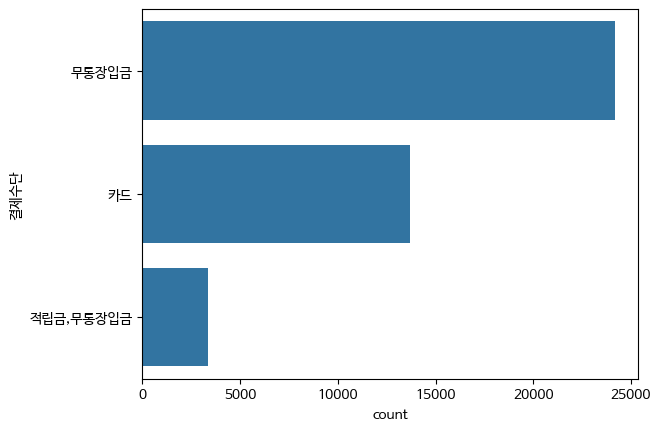

In [25]:
sns.countplot(data=df_SMDWD, y='결제수단', order=payment_list_top)

<Axes: xlabel='count', ylabel='결제수단'>

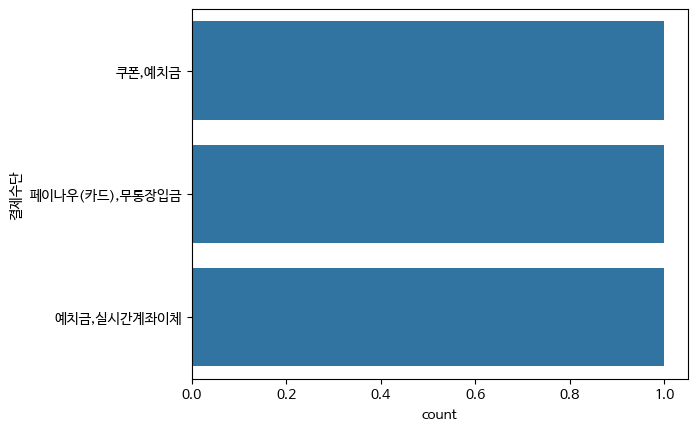

In [ ]:
sns.countplot(data=df_SMDWD, y='결제수단', order=payment_list_bottom)

#### 주문경로

In [54]:
df_SMDWD['주문경로'].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

In [40]:
series_SMDWD = df_SMDWD['주문경로'].value_counts()
order_list = series_SMDWD.iloc[:3].index.to_list()

<Axes: xlabel='count', ylabel='주문경로'>

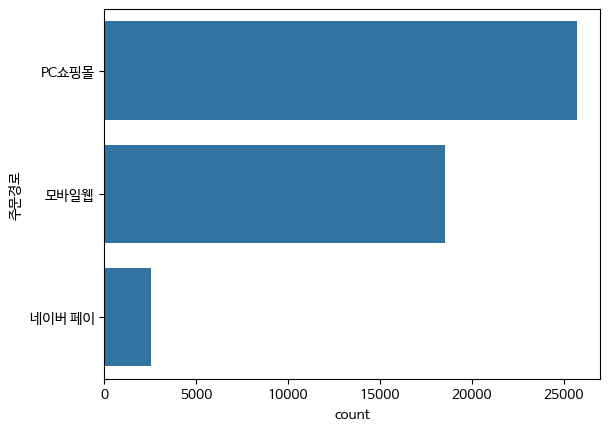

In [41]:
sns.countplot(data=df_SMDWD, y='주문경로', order=order_list)

#### 수량

In [55]:
df_SMDWD['수량'].value_counts()

1     41110
2      4199
3       878
4       252
5       223
6        40
10       16
7        11
8         7
15        5
17        2
16        1
46        1
20        1
11        1
50        1
12        1
Name: 수량, dtype: int64

In [49]:
series_SMDWD = df_SMDWD['수량'].value_counts()
payment_count_top = series_SMDWD.iloc[:3].index.to_list()
payment_count_bottom = series_SMDWD.iloc[-3:].index.to_list()

<Axes: xlabel='count', ylabel='수량'>

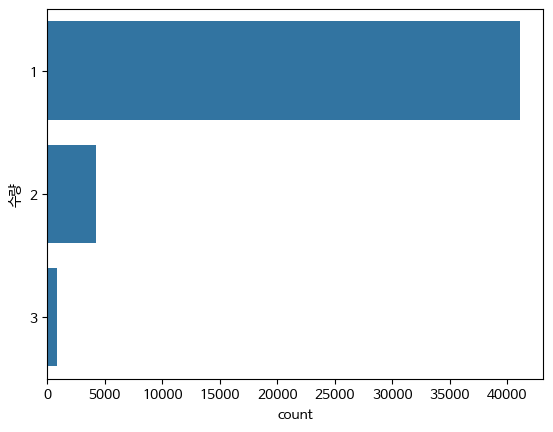

In [50]:
sns.countplot(data=df_SMDWD, y='수량', order=payment_count_top)

<Axes: xlabel='count', ylabel='수량'>

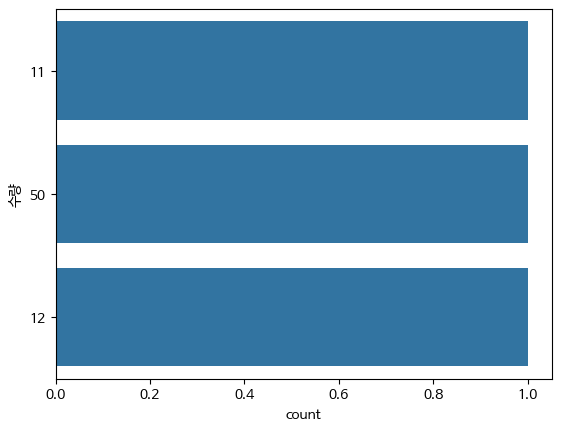

In [51]:
sns.countplot(data=df_SMDWD, y='수량', order=payment_count_bottom)